# Import things

In [22]:
# Import Module
import os
import re
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import numpy
from numpy import argmax
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, balanced_accuracy_score, mean_squared_error
import tensorflow as tf
from tensorflow import keras
import time
import collections
from matplotlib.pyplot import bar
from sklearn.utils import class_weight


# Folder Path
path = "E:/archiveII/SEQ"

# Change the directory
os.chdir(path)

# Making Functions

In [58]:
def eval_func(elapsed_time, X_test, y_test):
    classes = ('5s', '16s', '23s', 'rnasep', 'srp', 'telomerase', 'tmrna', 'trna', 'grp1', 'grp2')
    print("Run Time (secs):", elapsed_time) # computation time
    print("")
    
    y_proba_test = model.predict(X_test) 
    y_pred_test = argmax(y_proba_test, axis=1)
    mse_test = model.evaluate(X_test, y_test)
    print("test loss, test acc:", mse_test)
    print("")
    
    y_proba_train = model.predict(X_train) 
    y_pred_train = argmax(y_proba_train, axis=1)
    mse_train = model.evaluate(X_train, y_train)
    print("training loss, training acc:", mse_train)
    print("")
    
    print("Test Classification Accuracy:", accuracy_score(y_test, y_pred_test)) # accuracy
    print("Balanced Classification Accuracy:", balanced_accuracy_score(y_test, y_pred_test)) # accuracy
    print("F1 Score:", f1_score(y_test, y_pred_test, average='micro')) # F1 score
    print("")
    
    print(classification_report(y_test, y_pred_test, target_names=classes)) # classifcation report to get precision per class
    print("")
    
    print(np.unique(y_pred_test))
    print(np.unique(y_test))
    print("")

# Data Import

In [63]:
def sequence(file): ## returns the sequence in lower-case 
    if re.search(";",file):
        sequence = re.split("\n",file)[2]
        sequence = sequence[:-1]
        sequence = sequence.translate({ord(i): None for i in "nsyr"})
    else :
        sequence = "Unknown"
    return sequence.lower()

def sequence_to_onehot(sequence): ## one-hot encodes sequence, returns it as an array
    mapping = {base: n for n, base in enumerate('aucg')}
    one_hot_arr = np.zeros((800, 4), dtype=np.int32)

    for n, base in enumerate(sequence):
        one_hot_arr[n, mapping[base]] = 1
    
    return one_hot_arr

In [25]:
sequence = 'UCUGGUGACGAUAGGUAAGAUGGUUCACCUGUUCCCAUCCCGAACACAGAAGUUAAGCAUCUUAGCGCCGACGAUAGUUAUUACAAUUAGCGAAAAUAGGACGUUGCCAGGC'
sequence = sequence.lower()

In [37]:
sequence_code

'unknown'

In [38]:
sequence_list

[array([[1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 1, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]),
 array([[0, 1, 0, 0],
        [0, 1, 0, 0],
        [0, 1, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]),
 array([[1, 0, 0, 0],
        [1, 0, 0, 0],
        [0, 0, 0, 1],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]),
 array([[1, 0, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 1, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]),
 array([[0, 1, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 1, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]),
 array([[0, 1, 0, 0],
        [0, 0, 1, 0],
        [1, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]),
 array([[0, 0, 1, 0],
        [0, 0, 0, 1],
        [0, 1, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0,

In [69]:
class_list = []
sequence_list = []

for filename in os.listdir(path):
    f = os.path.join(path, filename)
    # checking if it is a file
    if os.path.isfile(f):
        files = open(filename, 'r').read().lower()
        sequence_code = sequence(files)
        
        f_name, f_ext = os.path.splitext(filename) #getting family name + RNA name
        class_name = f_name.lower().split("_",1)[0]
        
        if len(sequence_code) > 780:
            continue
        
        
        class_list.append(class_name)
        
        one_hot_rna = sequence_to_onehot(sequence_code) #one-hot encoding
        sequence_list.append(one_hot_rna)
        
X = np.array(sequence_list)
y = np.array(class_list)

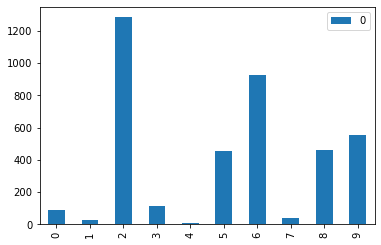

In [63]:
#### Frequency Plot of classes
frequency = collections.Counter(y)
df = pd.DataFrame.from_dict(frequency, orient='index')
df.plot(kind='bar')

In [64]:
df

,0
0,88
1,30
2,1283
3,115
4,11
5,454
6,928
7,37
8,462
9,557


In [66]:
# label datframe
classes = ('16s', '23s', '5s', 'grp1', 'grp2','rnasep', 'srp', 'telomerase', 'tmrna', 'trna')
class_df = pd.DataFrame(y, columns=['classes'])

# labelencoder
labelencoder = LabelEncoder()

# give em numbers
class_df['class_int'] = labelencoder.fit_transform(class_df['classes'])

y = np.array(class_df['class_int'])

In [44]:
np.save("y_Masters_ALL.npy", y)
np.save("X_Masters_ALL.npy", X)

In [9]:
y

array([0, 0, 0, ..., 9, 9, 9])

# Train-test Split

In [33]:
# Folder Path
path = "E:/archiveII"

# Change the directory
os.chdir(path)

In [34]:
classes = ('5s', '16s', '23s', 'rnasep', 'srp', 'telomerase', 'tmrna', 'trna', 'grp1', 'grp2')

y = np.load("y_Masters_ALL.npy")
X = np.load("X_Masters_ALL.npy")

X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.7)

X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

# Make MLP

In [35]:
image_width, image_height, image_Nchannels = 800, 4, 1

def build_MLP(kernel_init = "glorot_uniform", dropout_rate = 0.5):
    model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[image_width, image_height]),
    keras.layers.Dropout(rate=dropout_rate),
    keras.layers.Dense(300, activation="relu", kernel_initializer=kernel_init),
    keras.layers.Dropout(rate=dropout_rate),
    keras.layers.Dense(100, activation="relu", kernel_initializer=kernel_init),
    keras.layers.Dense(10, activation="softmax")
    ])

    model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
    return model

## Optimize Hyperparams

Will be markdowned after optimized

In [36]:
# power learning rate schedule
def power(lr0, s):
    def pwr_lr_fn(epoch):
        return lr0 / (1 + (epoch/s))
    return pwr_lr_fn

my_pwr_lr_fn = power(lr0=0.01, s=20) # start at learning rate of 0.01 and reduce every 20 steps
lr_scheduler_2 = keras.callbacks.LearningRateScheduler(my_pwr_lr_fn)

In [51]:
y

array([0, 0, 0, ..., 9, 9, 9])

In [44]:
y2 = (88., 40.,  1283.,  115., 11.,  454.,  928.,  37., 462.,  557.)

In [49]:
classes = np.unique(y)
classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [47]:
type(classes)

numpy.ndarray

In [42]:
classes = ('5s', '16s', '23s', 'rnasep', 'srp', 'telomerase', 'tmrna', 'trna', 'grp1', 'grp2')

In [52]:
class_weight = class_weight.compute_class_weight('balanced', classes=np.unique(y), y=y)

In [53]:
class_weight

array([ 4.50568182, 13.21666667,  0.30904131,  3.44782609, 36.04545455,
        0.87334802,  0.42726293, 10.71621622,  0.85822511,  0.71184919])

In [55]:
class_weight = dict(zip(classes, class_weight))
class_weight

{0: 4.505681818181818,
 1: 13.216666666666667,
 2: 0.30904130943102104,
 3: 3.4478260869565216,
 4: 36.04545454545455,
 5: 0.8733480176211453,
 6: 0.42726293103448276,
 7: 10.716216216216216,
 8: 0.8582251082251082,
 9: 0.7118491921005387}

# Run Model

In [67]:
start = time.perf_counter() # track computation time

model = build_MLP(kernel_init = 'he_normal', dropout_rate = 0.2) # model with optimal hyperparameters 
model.summary()

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True, monitor = 'val_accuracy', min_delta = 0.01)

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[lr_scheduler_2, early_stopping_cb]) # train with optimal hyperparameters

end = time.perf_counter()
elapsed_time = end - start # computation time

model.save("Chawn_MosesVanBawi-MLP-RNA")

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 3200)              0         
                                                                 
 dropout_11 (Dropout)        (None, 3200)              0         
                                                                 
 dense_17 (Dense)            (None, 300)               960300    
                                                                 
 dropout_12 (Dropout)        (None, 300)               0         
                                                                 
 dense_18 (Dense)            (None, 100)               30100     
                                                                 
 dense_19 (Dense)            (None, 10)                1010      
                                                                 
Total params: 991,410
Trainable params: 991,410
Non-tr

INFO:tensorflow:Assets written to: Chawn_MosesVanBawi-MLP-RNA\assets


# Evaluation

In [68]:
eval_func(elapsed_time, X_test, y_test)

Run Time (secs): 14.965194700000211

19/19 [==============================] - 0s 2ms/step - loss: 0.2314 - accuracy: 0.9328
test loss, test acc: [0.23143361508846283, 0.9327731132507324]

87/87 [==============================] - 0s 2ms/step - loss: 0.0928 - accuracy: 0.9813
training loss, training acc: [0.09280650317668915, 0.9812612533569336]

Test Classification Accuracy: 0.9327731092436975
Balanced Classification Accuracy: 0.6309633143923733
F1 Score: 0.9327731092436976

              precision    recall  f1-score   support

          5s       0.69      0.45      0.55        20
         16s       1.00      0.25      0.40         4
         23s       0.98      0.99      0.99       192
      rnasep       0.62      0.57      0.59        14
         srp       0.00      0.00      0.00         1
  telomerase       0.80      0.94      0.86        71
       tmrna       0.95      0.95      0.95       132
        trna       1.00      0.20      0.33         5
        grp1       0.99      0.95 

E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Build CNN

In [60]:
# function to build CNN model
def build_CNN(filters, kernel_size, activation):
    # the CNN
    model = keras.models.Sequential([
    keras.layers.Conv2D(filters=filters, kernel_size=kernel_size, activation=activation, 
                      padding="same", input_shape=[image_width, image_height, image_Nchannels]),
    #keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(filters=64, kernel_size=kernel_size, activation=activation, padding="same"),
    #keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(filters=32, kernel_size=kernel_size, activation=activation, padding="same"),
    #keras.layers.MaxPooling2D(2),

    # fully connected layers 
    keras.layers.Flatten(),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation="relu", kernel_initializer='he_normal'),
    keras.layers.Dropout(rate=0.2),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
    ])

    # compile model
    model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
    return model

In [61]:
start = time.perf_counter() # track computation time

model = build_CNN(filters=64, kernel_size=3, activation='relu') # model with optimal hyperparameters 
model.summary()

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True, monitor = 'val_accuracy', min_delta = 0.01)

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[lr_scheduler_2, early_stopping_cb], class_weight=class_weight) # train with optimal hyperparameters

end = time.perf_counter()
elapsed_time = end - start # computation time

model.save("Chawn_MosesVanBawi-MLP-CNN")

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 800, 4, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 800, 4, 64)        36928     
                                                                 
 conv2d_2 (Conv2D)           (None, 800, 4, 32)        18464     
                                                                 
 flatten_4 (Flatten)         (None, 102400)            0         
                                                                 
 batch_normalization (BatchN  (None, 102400)           409600    
 ormalization)                                                   
                                                                 
 dense_12 (Dense)            (None, 64)                6553664   
                                                      

INFO:tensorflow:Assets written to: Chawn_MosesVanBawi-MLP-CNN\assets


INFO:tensorflow:Assets written to: Chawn_MosesVanBawi-MLP-CNN\assets


In [62]:
eval_func(elapsed_time, X_test, y_test)

Run Time (secs): 549.7690344

19/19 [==============================] - 1s 62ms/step - loss: 0.2366 - accuracy: 0.9412
test loss, test acc: [0.23655156791210175, 0.9411764740943909]

87/87 [==============================] - 6s 65ms/step - loss: 0.0848 - accuracy: 0.9993
training loss, training acc: [0.08477900177240372, 0.999279260635376]

Test Classification Accuracy: 0.9411764705882353
Balanced Classification Accuracy: 0.8488422317320279
F1 Score: 0.9411764705882353

              precision    recall  f1-score   support

          5s       0.83      0.50      0.62        20
         16s       0.75      0.75      0.75         4
         23s       1.00      0.99      1.00       192
      rnasep       0.43      0.64      0.51        14
         srp       0.20      1.00      0.33         1
  telomerase       0.90      0.89      0.89        71
       tmrna       0.94      0.95      0.95       132
        trna       1.00      0.80      0.89         5
        grp1       0.99      0.96      0